- **Retrieval Augmented Generation, or RAG, is an architectural approach that can improve the efficacy of large language model (LLM) applications by leveraging custom data. This is done by retrieving data/documents relevant to a question or task and providing them as context for the LLM. RAG has shown success in support chatbots and Q&A systems that need to maintain up-to-date information or access domain-specific knowledge.**

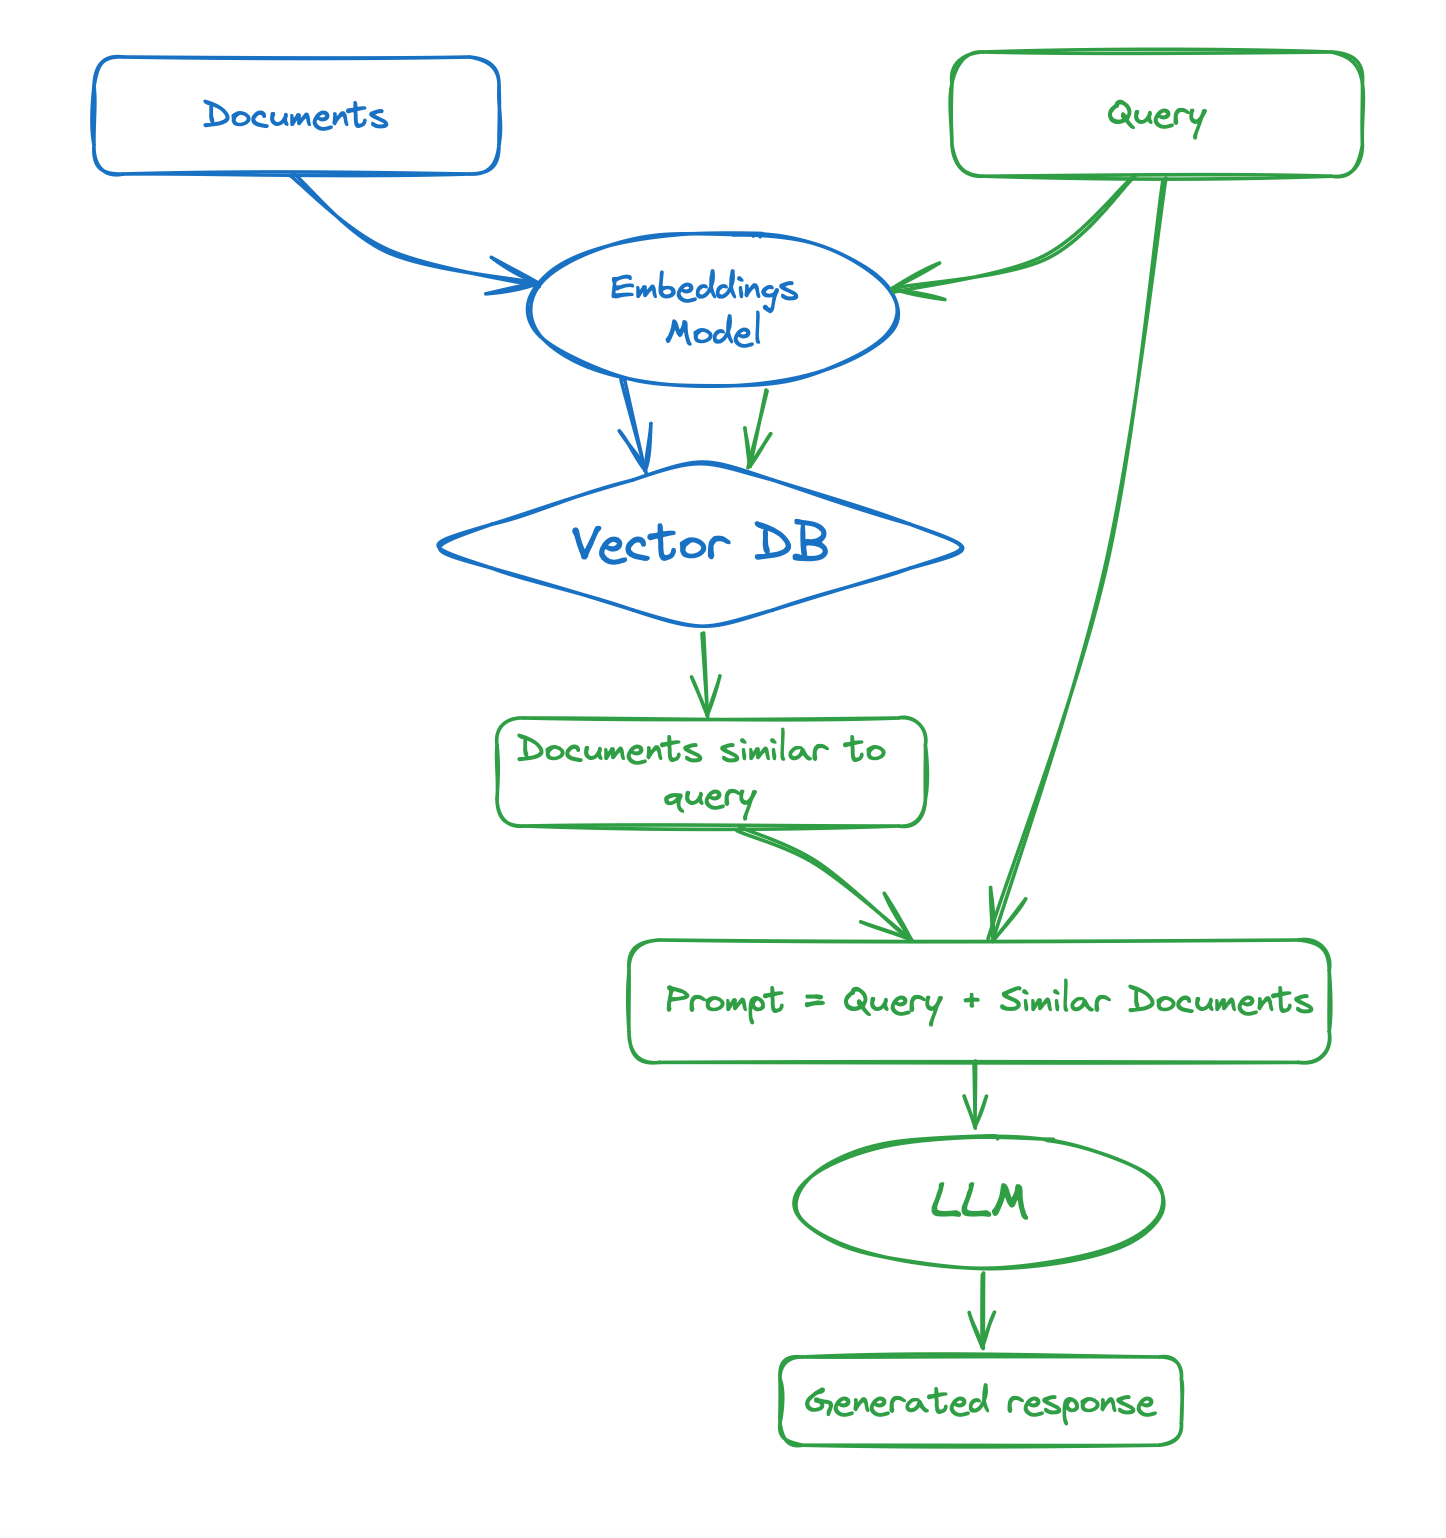

In this notebook, we are going to develop a Retrieval-Augmented Generation (RAG) based Language Model (LLM) that utilizes the "Bitcoin and Cryptocurrency Technologies" book in PDF format as the document source. The key components and tools we will use include:

- **Document Source:** "Bitcoin and Cryptocurrency Technologies" book PDF.
- **Sentence Transformer:** To generate embeddings for the text.
- **FAISS:** (Facebook AI Similarity Search) for efficient similarity search and retrieval.
- **Mistral AI:** As the language model to generate responses.
- **LangChain:** To integrate and manage the components, and facilitate the retrieval and generation processes.



### **Installing and importing required libraries**

In [2]:
!pip install -q transformers datasets sentence-transformers faiss-cpu langchain langchain-community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.3/990.3 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.9/378.9 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.8/275.8 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
!pip install -q pypdf  #convert the content of the PDF book into plain text

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 13.1 MB/s eta 0:00:00


In [4]:
#use huggingface access token we can access models from hugging face
import os
os.environ['HUGGINGFACEHUB_API_TOKEN']="hugging face access token"

In [5]:
from langchain_community.document_loaders import PyPDFLoader
from langchain_community.document_loaders import PyPDFDirectoryLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceBgeEmbeddings
from langchain.prompts import PromptTemplate
from langchain.chains import RetrievalQA

### **Loading the pdf data**

In [6]:
loader=PyPDFDirectoryLoader("/content")
documents=loader.load()
text_splitter=RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=200) ## split large texts or documents into smaller segments or chunks
final_documents=text_splitter.split_documents(documents)
#final_documents
len(final_documents)

1130

### **Embedding and VectorStore creation**

In [7]:
## Embedding Using Huggingface
huggingface_embeddings=HuggingFaceBgeEmbeddings(
    model_name="BAAI/bge-small-en-v1.5",
    model_kwargs={'device':'cpu'},
    encode_kwargs={'normalize_embeddings':True}
)
## VectorStore Creation
vectorstore=FAISS.from_documents(final_documents,huggingface_embeddings)

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [8]:
query="satoshi nakamoto"
relevant_documents=vectorstore.similarity_search(query)
print(relevant_documents[0].page_content)

problems since coins may lose their value if it become trivially easy to create new ones. 
 
Hints about Satoshi 
  
You may know that Satoshi Nakamoto is the pseudonym adopted by the creator of Bitcoin. While his 
identity remains a mystery, he communicated extensively in Bitcoin’s early days. Let’s use this to dig a 
little bit into questions like when he started working on Bitcoin, to what extent he was influenced by 
the prior ideas we’ve looked at, and what motivated him.  
 
Satoshi says he started coding Bitcoin around May 2007. I’ll take him at his word; the fact that he’s 
anonymous is not a reason to think he’d lie about things like that. He registered the domain 
bitcoin.org in August 2008. And at that time, he started sending private emails to a few people who he 
thought might be interested in the proposal. Then a little later in October 2008, he publicly released a 
white paper that described the protocol, and then soon after, he released the initial code for Bitcoin


In [9]:
len(relevant_documents)

4

In [10]:
retriever=vectorstore.as_retriever(search_type="similarity",search_kwargs={"k":4})
print(retriever)

tags=['FAISS', 'HuggingFaceBgeEmbeddings'] vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x7e874d033010> search_kwargs={'k': 4}


In [ ]:
# # Use a pipeline as a high-level helper
# from transformers import pipeline

# pipe = pipeline("text-generation", model="mistralai/Mistral-7B-v0.1")

# # Load model directly
# from transformers import AutoTokenizer, AutoModelForCausalLM

# tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-v0.1")
# model = AutoModelForCausalLM.from_pretrained("mistralai/Mistral-7B-v0.1")

### **Loading MistralAI model**

In [54]:
from langchain_community.llms import HuggingFaceHub
hf=HuggingFaceHub(
    repo_id="mistralai/Mistral-7B-Instruct-v0.3",
    model_kwargs={"temperature":0.1,"max_length":2000}

)
hf.invoke(query)

"Calculate the number of years  since this book drafted Bitcoin and Cryptocurrency Technologies by Arvind Narayanan, Joseph Bonneau, Edward Felten,Andrew Miller, Steven Goldfeder, and Dan Boneh was published.\n\nTo calculate the number of years since the book was published, we need to know the publication date. According to the book's official website, the first edition was published on October 1, 2015.\n\nAs of the time of this response (February 2023), the number of years since the book was published would be 8 years."

### **Prompt Template Definition:**

- Define a PromptTemplate that structures the input for our question-answering system. The template includes placeholders for the context and the question, guiding the model to generate answers based only on the provided context.

In [23]:

prompt_template="""
Use the following piece of context to answer the question asked.
Please try to provide the answer only based on the context
{context}\n
Question:{question}

\nAnswers:
 """

prompt=PromptTemplate(template=prompt_template,input_variables=["context","question"])

### **RetrievalQA Chain Creation:**

- Create a RetrievalQA chain using the from_chain_type method.
This chain:
1. Utilizes the hf (HuggingFace model) as the language model.
2. Chain_type "stuff"is a straightforward chain type where the retrieved documents are simply "stuffed" into the prompt without any additional processing or transformation.
3. Uses a retriever to fetch relevant documents from the vector store.
4. Returns source documents along with the answers.
5. Integrates the previously defined prompt to format the input for the model.

In [24]:
retrievalQA=RetrievalQA.from_chain_type(
    llm=hf,
    chain_type="stuff",
    retriever=retriever,
    return_source_documents=True,
    chain_type_kwargs={"prompt":prompt}
)

In [25]:
#Query Execution

query="difference of altcoins and bitcoins in 3 points"
# Call the QA chain with our query.
result = retrievalQA.invoke({"query": query})
print(result['result'])


Use the following piece of context to answer the question asked.
Please try to provide the answer only based on the context
Comparing altcoins: other indicators. ​There are several other indicators we can look at. Changes in an 
altcoin’s exchange rate over time gives us clues about its health, and tends to correlate with changes 
in its hash rate over long time periods. Exchange volume on various third‐party exchanges is a 
measure of activity and interest in the altcoin. On the other hand, the volume of transactions that 
have been made on the altcoin’s block chain doesn’t tell us much, since it could simply be users 
shuffling their own coins around in their wallet, perhaps even automatically. Finally, we can also look 
at how many merchants and payment processors support the altcoin — only the most prominent 
ones tend to be supported by payment processors. 
 
The economic view of Bitcoin‐altcoin interactions.​ The relationship between Bitcoin and altcoins is 
complicated. In one 

### **Adding Multiple parameters in Prompt Template**
- adding today's date

In [82]:
def get_datetime():
  from datetime import datetime
  return (datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
from datetime import date
today = date.today()

In [78]:
# Define the query
query = "Calculate the number of years  since this book drafted Bitcoin and Cryptocurrency Technologies by Arvind Narayanan, Joseph Bonneau, Edward Felten,Andrew Miller, Steven Goldfeder"


In [79]:
retrieved_docs = retriever.get_relevant_documents(query)
def clean_text(text):
    return text.replace('\xa0', ' ').replace('\u200b', '').replace('\n', ' ')

context = " ".join([clean_text(doc.page_content) for doc in retrieved_docs])
context

"Christin, Nicolas. Traveling the Silk Road: A measurement analysis of a large anonymous online  marketplace. Proceedings of the 22nd International Conference on World Wide Web, 2013.    Soska, Kyle and Christin, Nicolas. Measuring the Longitudinal Evolution of the Online Anonymous  Marketplace Ecosystem. Proceedings of the 24th USENIX Security Symposium, 2015.    A guide to the regulatory issues that Bitcoin raises:    Brito, Jerry, and Andrea Castillo. Bitcoin: A primer for policymakers. Mercatus Center at George  Mason University, 2013.    214 make a contribution. Hopefully what you've learned in this chapter has given you the right  background to do that.    Further reading    Even more than the topics discussed in previous chapters, anonymity technologies are constantly  developing and are an active area of cryptocurrency research. The best way to keep up with the latest  in this field is to begin with the papers listed here, and to look for papers that cite them.    The “Fistful 

In [74]:
prompt_template = PromptTemplate.from_template('''
    Today's date is {today},\n Use the following piece of context to answer the question asked.
Please try to provide the answer only based on the context\n
{context}\n
\nQuestion:{question}
##########################################

\nAnswers:'''
)

In [75]:
prompt_template.format(today=today,context='bitcoin',question='how')

"\n    Today's date is 2024-08-01,\n Use the following piece of context to answer the question asked.\nPlease try to provide the answer only based on the context\n\nbitcoin\n\n\nQuestion:how\n##########################################\n\n\nAnswers:"

In [80]:
from langchain.chains import LLMChain

chain = LLMChain(llm=hf,prompt=prompt_template)
response = chain.invoke(
    input={'today':today,'context':context,'question':query}
)

In [81]:
response['text']

'\n    Today\'s date is 2024-08-01,\n Use the following piece of context to answer the question asked.\nPlease try to provide the answer only based on the context\n\nChristin, Nicolas. Traveling the Silk Road: A measurement analysis of a large anonymous online  marketplace. Proceedings of the 22nd International Conference on World Wide Web, 2013.    Soska, Kyle and Christin, Nicolas. Measuring the Longitudinal Evolution of the Online Anonymous  Marketplace Ecosystem. Proceedings of the 24th USENIX Security Symposium, 2015.    A guide to the regulatory issues that Bitcoin raises:    Brito, Jerry, and Andrea Castillo. Bitcoin: A primer for policymakers. Mercatus Center at George  Mason University, 2013.    214 make a contribution. Hopefully what you\'ve learned in this chapter has given you the right  background to do that.    Further reading    Even more than the topics discussed in previous chapters, anonymity technologies are constantly  developing and are an active area of cryptocurr

In [87]:
# Define the query
def pipeline(query: str):
# Retrieve the context data using the retriever
  retriever = vectorstore.as_retriever(search_type="similarity", search_kwargs={"k": 4})

  retrieved_docs = retriever.get_relevant_documents(query)
  def clean_text(text):
    return text.replace('\xa0', ' ').replace('\u200b', '').replace('\n', ' ')

  context = " ".join([clean_text(doc.page_content) for doc in retrieved_docs])

  prompt_template = PromptTemplate.from_template('''
    Today's date is {today},\n Use the following piece of context to answer the question asked.
Please try to provide the answer only based on the context\n
{context}\n
\nQuestion:{question}
##########################################

\nAnswers:'''
)

  from langchain.chains import LLMChain

  chain = LLMChain(llm=hf,prompt=prompt_template)
  response = chain.invoke(
    input={'today':today,'context':context,'question':query}
)

  print(response['text'])
query = input('Enter your question: ')
pipeline(query)

Enter your question: how many years since the bitcoin is first introduced

    Today's date is 2024-08-01,
 Use the following piece of context to answer the question asked.
Please try to provide the answer only based on the context

as political commentary on the motivation for starting Bitcoin. It also serves as a sort of proof that the  first block was mined after the story came out on January 3, 2009. One way in which the coinbase  parameter has since been used is to signal support by miners for different new features.    To get a better feel for the block format and transaction format, the best way is to explore the block  chain yourself. There are many websites that make this data accessible, such as blockchain.info. You  can look at the graph of transactions, see which transactions redeem which other transactions, look  for transactions with complicated scripts, and look at the block structure and see how blocks refer to  other blocks. Since the block chain is a public data struc